# Εργασία
## Επιχειρηματική Ευφυΐα και Ανάλυση Μεγάλων Δεδομένων
<br />

## Κατηγοριοποίηση σκυλιών και γατιών με χρήση συνελικτικών νευρωνικών δικτύων(CNN)
#### ΝΙΚΟΛΑΟΣ ΓΙΑΝΝΟΠΟΥΛΟΣ ΑΜ:18389140

Στην παρούσα εργασία επιχειρείται η κατηγοριοποίηση σκυλιών και γατιών με χρήση συνελικτικών νευρωνικών δικτύων(CNN) και είσοδο εικόνων, για τον σκοπό αυτό χρησιμοποιήθηκε το dataset: https://www.kaggle.com/ashfakyeafi/cat-dog-images-for-classification, το οποίο περιέχει 25000 φωτογραφίες σκυλιών και γατιών.

## Αρχικά γίνεται φόρτωση  απαραίτητων βιβλιοθηκών

In [1]:
import numpy as np
import os
import cv2 #image manipulation
import random
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Φόρτωση και επεξεργασία των εικόνων

In [2]:
img_dir='../input/cat-dog-images-for-classification/cat_dog'

Οι εικόνες μετατρέπονται σε array, επεξεργάζονται οι διαστάσεις τους και τοποθεντούνται σε μια λίστα μαζί με την κατηγορία τους(γάτα, σκύλος).

In [3]:
IMG_SIZE = 70
data = []

for img in os.listdir(img_dir):
    if(img.startswith('cat')):
        label = 0
    else:
        label = 1
    img_path = os.path.join(img_dir, img)# os.path.join joins images path with the current 'img' path, so it makes the path of the 'img'
    img_arr = cv2.imread(img_path) # cv2.imread converts img to array
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    img_arr = img_arr/255 # 0-255 -> 0-1
    data.append([img_arr, label])

In [4]:
len(data) # number of images

25000

In [5]:
random.shuffle(data) # shuffles the images

In [6]:
data[0]

[array([[[0.32156863, 0.20392157, 0.23529412],
         [0.31764706, 0.2       , 0.23137255],
         [0.20784314, 0.10980392, 0.1372549 ],
         ...,
         [0.39215686, 0.25098039, 0.29019608],
         [0.41176471, 0.23529412, 0.29803922],
         [0.41568627, 0.22745098, 0.29411765]],
 
        [[0.34117647, 0.22352941, 0.25490196],
         [0.32156863, 0.20392157, 0.23529412],
         [0.22352941, 0.1254902 , 0.14901961],
         ...,
         [0.64705882, 0.55294118, 0.48627451],
         [0.62745098, 0.52941176, 0.45490196],
         [0.62745098, 0.51764706, 0.4745098 ]],
 
        [[0.3372549 , 0.21568627, 0.25098039],
         [0.3254902 , 0.20784314, 0.23921569],
         [0.23137255, 0.13333333, 0.15686275],
         ...,
         [0.71764706, 0.69803922, 0.54509804],
         [0.7254902 , 0.71764706, 0.53333333],
         [0.71764706, 0.70196078, 0.56862745]],
 
        ...,
 
        [[0.47843137, 0.41568627, 0.3254902 ],
         [0.68627451, 0.63137255, 0.51764

Τα δεδομένα χωρίζονται σε εισόδους **X**(διαστασεις, κανάλια χρώματος(RGB = 3)) και εξόδους **y**(0 = γάτα, 1 = σκύλος)

In [7]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [8]:
X[0].shape

(70, 70, 3)

In [9]:
# converts inputs and outputs lists into arrays
X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(25000, 70, 70, 3)

In [11]:
y.shape

(25000,)

Οι είσοδοι και οι έξοδοι χωρίζονται σε εκπαίδευσης ***train*** και δοκιμής ***test***

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=54)

In [13]:
X_train.shape

(20000, 70, 70, 3)

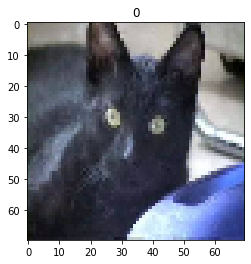

In [14]:
plt.title(y_train[7])
plt.imshow(X_train[7])

In [15]:
#To clear memory(RAM)
data = None
X = None
y = None

Δημιουργούμε ένα συνελικτικό μοντέλο νευρωνικού δικτύου με την χρήση της Tensorflow, keras. Αρχίζουμε με ένα layer(επίπεδο) με 32 συνελικτικά φίλτρα (**Conv2D**) 3χ3 το καθένα και συνάρτηση **relu**, προστίθεται ένα layer **MaxPooling** που βοηθάει στην επιλογή των καλύτερων χαρακτηριστικών τις εικόνας. Στη συνέχεια επαναλαμβάνεται η διαδικασία με άλλα 32 συνελικτικά φίλτρα και με 64 συνελικτικά φίλτρα τα οποία επιλέχθηκαν πειραματικά. Τέλος τα layers ισοπεδώνονται(**flatten**) και γίνονται μονοδιάστατα, παιρνούν από ένα πλήρως συνδεδεμένο **Dense** layer 64 νευρώνων, προστίθεται ένα **Dropout** layer το οποίο αποσύρει τυχαία νευρώνες για την αποφυγή overfitting και τέλος χωρίζονται σε 2 πλήρως συνδεδεμένους νευρώνες(**Dense**) ώσες και οι έξοδοι με συνάρτηση softmax για να υπολογιστούν οι πιθανότητες εξόδου.

In [16]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape = (IMG_SIZE, IMG_SIZE, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

2022-01-16 19:27:04.792498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 19:27:04.878928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 19:27:04.879674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 19:27:04.881492: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
model.summary() # neural network architecture summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

Το μοντέλο "μεταγλωτίζεται"(**compile**) όπου προστίθεται συνάρτηση απώλειας(sparse categorical crossentropy) η οποία μετρά την ακρίβεια του μοντέλου κατά τη διάρκεια της εκπαίδευσης για δείγματα που ανείκουν μόνο σε μία κλάση(σκύλος, γάτα). Ακόμα προστίθεται βελτιστοποιητής(**adam**) o οποίος βρίσκει τα καλύτερα βάρη του νευρωνικού δικτύου ελαχιστοποιώντας της συνάρτηση απώλειας, και τέλος προστίθενται "μετρικές"(**accuracy**) όπου μετριέται η ακρίβεια των προβλέψεων του δικτύου.

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", 
              metrics=["accuracy"])

### Στη συνέχεια το μοντέλο εκπαιδεύεται 

In [19]:
history= model.fit(X_train, y_train,
                             batch_size = 64,
                             validation_data=(X_test,y_test),
                             steps_per_epoch = len(X_train) // 64,
                             epochs=30,
                             verbose=1)

2022-01-16 19:27:07.465074: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1176000000 exceeds 10% of free system memory.
2022-01-16 19:27:08.709811: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1176000000 exceeds 10% of free system memory.
2022-01-16 19:27:09.553641: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-01-16 19:27:10.827186: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


312/312 [==============================] - 10s 10ms/step - loss: 0.6743 - accuracy: 0.5751 - val_loss: 0.6316 - val_accuracy: 0.6476
Epoch 2/30
312/312 [==============================] - 2s 8ms/step - loss: 0.5797 - accuracy: 0.6978 - val_loss: 0.5240 - val_accuracy: 0.7422
Epoch 3/30
312/312 [==============================] - 3s 8ms/step - loss: 0.4987 - accuracy: 0.7628 - val_loss: 0.4679 - val_accuracy: 0.7754
Epoch 4/30
312/312 [==============================] - 2s 7ms/step - loss: 0.4428 - accuracy: 0.7995 - val_loss: 0.4132 - val_accuracy: 0.8132
Epoch 5/30
312/312 [==============================] - 2s 7ms/step - loss: 0.4069 - accuracy: 0.8192 - val_loss: 0.4006 - val_accuracy: 0.8128
Epoch 6/30
312/312 [==============================] - 2s 8ms/step - loss: 0.3705 - accuracy: 0.8369 - val_loss: 0.4382 - val_accuracy: 0.8062
Epoch 7/30
312/312 [==============================] - 2s 7ms/step - loss: 0.3378 - accuracy: 0.8571 - val_loss: 0.3682 - val_accuracy: 0.8404
Epoch 8/30
312/

Από την εκπαίδευση του μοντέλου παρατηρείται ότι από την 11η επόχη(**epoch**) σταματάει να μαθαίνει το μοντέλο για πραγματικά δεδομένα καθώς το **Val_loss** αυξάνεται και το **Val_accuracy** μένει στάσιμο, τα οποία αφορούν δείγματα τα οποία δεν έχει ξαναδεί το μοντέλο.

Μια λύση σε αυτό είναι να του δώσουμε παραπάνω δειγμάτα.
Για την εξοικονόμηση χώρου γίνεται **augmentation** των ήδη υπάρχων δειγμάτων, όπου οι εικόνες τροποποιούνται με διάφορες δοθείσες τεχνικες(**ImageDataGenerator**).

Στη συνέχεια ξανά εκπαιδεύεται με τις τροποποιημένες εικόνες.

In [20]:
dataAugmentation = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, width_shift_range = 0.1, height_shift_range = 0.1)

In [21]:
history2= model.fit(dataAugmentation.flow(X_train, y_train, batch_size = 64),
                             validation_data=(X_test,y_test),
                             steps_per_epoch = len(X_train) // 64,
                             epochs=30,
                             verbose=1)

Epoch 1/30
312/312 [==============================] - 33s 103ms/step - loss: 0.5345 - accuracy: 0.7558 - val_loss: 0.3738 - val_accuracy: 0.8422
Epoch 2/30
312/312 [==============================] - 32s 102ms/step - loss: 0.4460 - accuracy: 0.7927 - val_loss: 0.3621 - val_accuracy: 0.8356
Epoch 3/30
312/312 [==============================] - 32s 103ms/step - loss: 0.4270 - accuracy: 0.8077 - val_loss: 0.3562 - val_accuracy: 0.8328
Epoch 4/30
312/312 [==============================] - 32s 102ms/step - loss: 0.4128 - accuracy: 0.8077 - val_loss: 0.3509 - val_accuracy: 0.8366
Epoch 5/30
312/312 [==============================] - 32s 102ms/step - loss: 0.4010 - accuracy: 0.8170 - val_loss: 0.3555 - val_accuracy: 0.8354
Epoch 6/30
312/312 [==============================] - 32s 102ms/step - loss: 0.3917 - accuracy: 0.8256 - val_loss: 0.3343 - val_accuracy: 0.8520
Epoch 7/30
312/312 [==============================] - 32s 103ms/step - loss: 0.3808 - accuracy: 0.8302 - val_loss: 0.3181 - val_ac

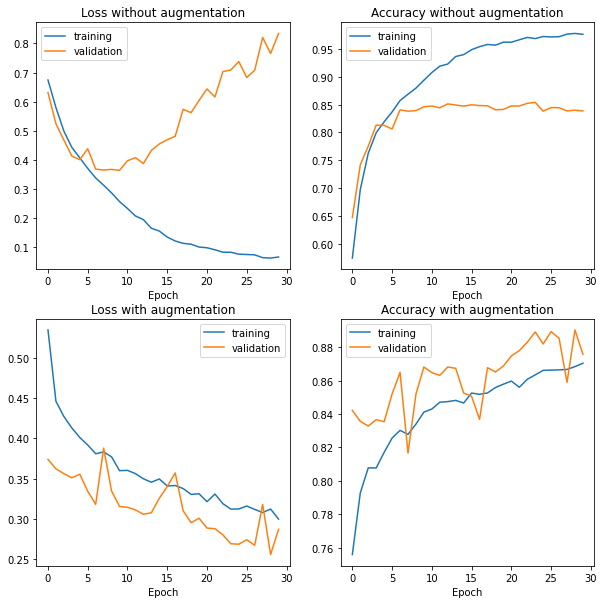

In [22]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))

axs[0, 0].plot(history.history['loss'])
axs[0, 0].plot(history.history['val_loss'])
axs[0, 0].legend(['training', 'validation'])
axs[0, 0].set_title('Loss without augmentation')

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].plot(history.history['val_accuracy'])
axs[0, 1].legend(['training', 'validation'])
axs[0, 1].set_title('Accuracy without augmentation')

axs[1, 0].plot(history2.history['loss'])
axs[1, 0].plot(history2.history['val_loss'])
axs[1, 0].legend(['training', 'validation'])
axs[1, 0].set_title('Loss with augmentation')

axs[1, 1].plot(history2.history['accuracy'])
axs[1, 1].plot(history2.history['val_accuracy'])
axs[1, 1].legend(['training', 'validation'])
axs[1, 1].set_title('Accuracy with augmentation')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

Στα παραπάνω γραφήματα μπορούμε να δούμε ότι με χωρίς το **augmentation** των δεδομένω το μοντέλο παθαίνει **overfitting**, ενώ με **augmentation** συνεχίζει και γίνεται καλύτερο.

## Πρόβλεψη κατηγοριοποίησης
Tο μοντέλο προβλέπει όλα τα δοκιμαστικά δεδομένα εκ των οποίων έιναι 2438 γάτες και 2562 σκύλοι, με τα οποία δεν έχει εκπαιδευτεί και έχει ακρίβεια 88%.

In [23]:
y_pred = model.predict(X_test)

In [24]:
br_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, br_pred, target_names=['Cat','Dog']))

              precision    recall  f1-score   support

         Cat       0.93      0.81      0.87      2513
         Dog       0.83      0.94      0.88      2487

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [25]:
y_pred[2]

array([0.04241086, 0.9575891 ], dtype=float32)

Prediction:  1


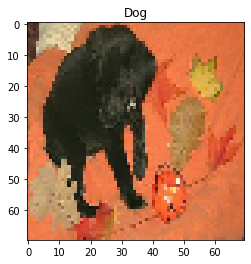

In [26]:
print('Prediction: ', np.argmax(y_pred[2])) # argmax returns the indices of the maximum values
plt.title('Cat' if y_test[2] == 0 else 'Dog')
plt.imshow(X_test[2])